In [29]:
# Notebook to study esmeralda 
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re
from collections import Counter

%matplotlib inline

In [30]:
# Load in the dataframe

events = pd.read_hdf("../data/NEW_Data_Tl208_Esmeralda/cdst_7746_v1.2.0_trigger2_bg.h5", '/CHITS/lowTh')

metadata = pd.read_hdf("../data/NEW_Data_Tl208_Esmeralda/cdst_7746_v1.2.0_trigger2_bg.h5", '/Summary/Events')
display(metadata)

,event,evt_energy,evt_charge,evt_ntrks,evt_nhits,evt_x_avg,evt_y_avg,evt_z_avg,evt_r_avg,evt_x_min,evt_y_min,evt_z_min,evt_r_min,evt_x_max,evt_y_max,evt_z_max,evt_r_max,evt_out_of_map
0,1,0.238376,-1.0,1,37,-23.635473,-46.033134,335.425398,52.234989,-35.0,-65.0,332.778185,38.078866,-5.0,-35.0,339.687220,69.641941,False
1,7,0.335598,-1.0,1,36,-135.649480,-27.828993,155.537656,138.684092,-155.0,-45.0,152.674953,125.896783,-125.0,-15.0,157.736506,157.003185,False
2,20,0.449683,-1.0,1,58,11.388019,168.250244,244.763036,168.786497,-5.0,155.0,238.861932,155.080624,25.0,185.0,249.482353,186.681547,False
3,21,0.231753,-1.0,1,30,-47.572942,-2.542974,332.936846,48.134566,-65.0,-15.0,329.015076,35.355339,-35.0,15.0,335.901912,65.192024,False
4,28,NaN,-1.0,1,190,NaN,NaN,NaN,NaN,-205.0,-5.0,269.224555,105.118980,-105.0,55.0,334.883022,206.518764,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603817,2284797,0.283948,-1.0,1,34,-155.049400,-9.927948,145.819564,155.637380,-165.0,-25.0,142.901947,125.896783,-125.0,15.0,149.797537,166.883193,False
603818,2284801,0.231736,-1.0,1,29,-178.350162,-11.949008,189.773068,178.904046,-195.0,-25.0,187.480632,165.075740,-165.0,5.0,192.666857,195.576072,False
603819,2284809,0.219694,-1.0,1,28,26.430435,-24.647585,173.564698,36.700805,15.0,-35.0,170.625400,21.213203,35.0,-15.0,177.583412,49.497475,False
603820,2284819,0.234677,-1.0,1,21,-47.938171,-134.719409,3.150993,143.137911,-65.0,-145.0,0.637779,129.807550,-35.0,-125.0,5.095997,155.080624,False


,event,evt_energy,evt_charge,evt_ntrks,evt_nhits,evt_x_avg,evt_y_avg,evt_z_avg,evt_r_avg,evt_x_min,evt_y_min,evt_z_min,evt_r_min,evt_x_max,evt_y_max,evt_z_max,evt_r_max,evt_out_of_map
4388,17270,1.698531,-1.0,1,262,-34.447183,-85.047585,256.952659,96.040481,-85.0,-125.0,235.936570,60.415230,15.0,-45.0,277.772581,132.853303,False
4397,17308,1.629562,-1.0,1,192,34.916204,82.392098,346.594164,90.712885,5.0,35.0,313.008061,51.478151,55.0,115.0,375.054182,120.208153,False
4893,19240,1.710155,-1.0,1,197,50.172038,129.599622,109.482558,139.924701,5.0,95.0,89.544660,109.772492,75.0,175.0,140.420119,175.641681,False
4909,19312,1.656181,-1.0,1,187,94.610622,65.791608,255.255736,117.101232,65.0,25.0,242.202105,82.764727,145.0,95.0,280.378338,168.077363,False
4933,19412,1.634091,-1.0,1,199,5.319678,-11.796427,228.724936,17.131139,-15.0,-35.0,200.431491,7.071068,35.0,15.0,265.835635,43.011626,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601643,2278116,2.350053,-1.0,1,330,95.501303,-70.454787,336.118622,119.858447,75.0,-115.0,287.082772,82.764727,115.0,-25.0,381.971857,155.724115,False
601647,2278126,1.668354,-1.0,1,277,-100.985247,-71.376027,276.057946,125.078786,-145.0,-95.0,261.219904,57.008771,-35.0,-45.0,290.170224,163.248277,False
603598,2285336,2.209810,-1.0,1,271,-2.289656,139.034360,173.949175,140.774667,-45.0,85.0,149.794104,85.146932,45.0,185.0,231.998211,186.681547,False
603607,2284005,1.693143,-1.0,1,256,75.182421,-81.162180,282.060896,112.408680,35.0,-125.0,260.871920,73.824115,115.0,-55.0,304.431371,145.773797,False


1.6985310637742639
1.6295620984548733
1.7101554027914594
1.6561811294070234
1.6340908602543909
1.6362603658631312
1.6301168387422
1.6441264422092405
2.480865204468949
2.6094528964652794
1.6069828400743897
2.0668601681088488
2.2734083628627455
1.6499078275938555
1.8609364082479583
1.6737421709432678
2.0965442916186707
1.624943597845439
1.9343447804999054
1.677954245347133
2.216878210495318
1.677585885969026
1.609488398681386
2.1374554162936708
1.834927383330664
1.9771884700224573
2.4517470875056504
1.7967163911204438
1.6397867980424665
1.6259816026466833
1.642176898183395
1.8408069600539458
1.5762905421431181
1.6644790217290604
1.6490053382833272
2.0437327562079592
1.5892875472177732
1.642315582000613
1.664725614064841
1.6371536774030235
1.627351184625291
2.4130697550628746
1.6181221575917344
2.3973120413348132
1.8868420103689276
2.472216378400039
1.652623790181115
1.8830567419429534
1.6096273625141855
1.5761243881435458
2.04969316817061
1.6455885009805389
1.784675874821459
1.9621614567

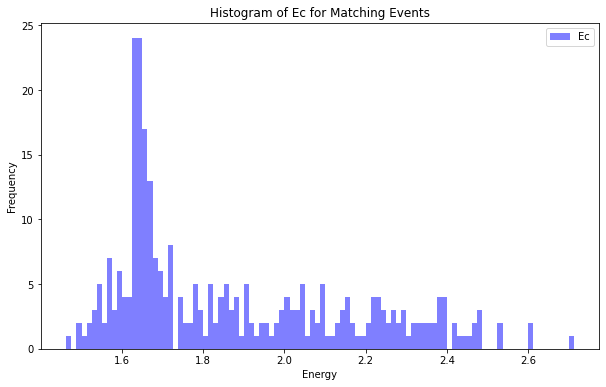

In [121]:
eventid_path = '../combined_output2.csv'
#eventid_energy = np.genfromtxt(eventid_path, delimiter=',', names=True)
eventid_energy = pd.read_csv(eventid_path, delimiter=',')

chit_filtered = metadata[metadata['event'].isin(eventid_energy['Eventid'])]
display(chit_filtered)

plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(chit_filtered['evt_energy'], bins = 100, alpha=0.5, label='Ec', color='blue')
for energy in chit_filtered['evt_energy']:
    print(energy)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Histogram of Ec for Matching Events')
plt.legend()
plt.show()

In [31]:
# Loop over and get high energy events

high_e_events = metadata[metadata.evt_energy > 1].event.values
print(high_e_events)

events_high_e = events[events.event.isin(high_e_events)]
display(events_high_e)


# event = events[events.event == high_e_events[0]]
# display(event)

[     93     153     172 ... 2284671 2286050 2284791]


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
3353,93,1.578221e+09,0,37.461837,39.711467,1,25.0,5.0,0.0,0.0,170.780740,42.499352,1061.546013,-1.0,0.003993,-1,-1.0
3354,93,1.578221e+09,0,37.461837,39.711467,1,35.0,5.0,0.0,0.0,170.780740,21.733210,542.850684,-1.0,0.002060,-1,-1.0
3355,93,1.578221e+09,0,37.461837,39.711467,1,25.0,15.0,0.0,0.0,170.780740,15.381822,384.206131,-1.0,0.001442,-1,-1.0
3356,93,1.578221e+09,0,37.461837,39.711467,1,35.0,-5.0,0.0,0.0,170.780740,14.387651,359.373814,-1.0,0.001364,-1,-1.0
3357,93,1.578221e+09,0,37.461837,39.711467,1,25.0,-5.0,0.0,0.0,170.780740,12.427661,310.417300,-1.0,0.001172,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126772070,2284791,1.578297e+09,0,3.428087,65.330532,1,15.0,65.0,0.0,0.0,357.865041,14.949471,591.855457,-1.0,0.002289,-1,-1.0
126772071,2284791,1.578297e+09,0,3.428087,65.330532,1,15.0,75.0,0.0,0.0,357.865041,12.313145,487.482273,-1.0,0.001913,-1,-1.0
126772072,2284791,1.578297e+09,0,3.428087,65.330532,1,25.0,65.0,0.0,0.0,357.865041,11.850658,469.172259,-1.0,0.001841,-1,-1.0
126772073,2284791,1.578297e+09,0,3.428087,65.330532,1,15.0,55.0,0.0,0.0,357.865041,7.642950,302.587419,-1.0,0.001138,-1,-1.0


1.2596235290850042


<Figure size 432x288 with 0 Axes>

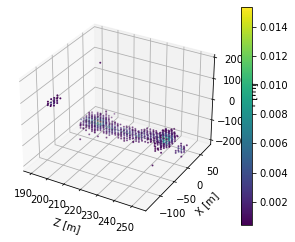

In [53]:
event = events_high_e[events_high_e.event ==  high_e_events[28]]

print(event.Ec.sum())

plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Z [m]')
ax.set_ylabel('X [m]')
ax.set_zlabel('Y [m]')


fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('white')  # Set the background color to white

p = ax.scatter(event.Z,event.X,event.Y,cmap='viridis',c=event.Ec, s=1, zorder=2) #coolwarm
cb = fig.colorbar(p, ax=ax)
# cb.set_label('Energy [keV]')
# ax.set_title(f"Event: {evt}")

[ 0  2  4  6  8 10 12 14 16 18]


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
6571,10,1.016959e+07,0,36.114877,1.045253,1,7.775,-7.775,0.000000e+00,0.000000e+00,594.307298,6.898551,1379.871095,-1.0,0.003774,-1,-1.0
6572,10,1.016959e+07,0,36.114877,1.045253,1,-7.775,-7.775,8.881784e-16,8.881784e-16,594.307298,6.144928,1229.128905,-1.0,0.003366,-1,-1.0
6573,10,1.016959e+07,0,36.114877,1.045253,1,7.775,7.775,0.000000e+00,0.000000e+00,595.161997,7.768116,449.878001,-1.0,0.001231,-1,-1.0
6574,10,1.016959e+07,0,36.114877,1.045253,1,-7.775,7.775,0.000000e+00,0.000000e+00,595.161997,6.956522,402.875806,-1.0,0.001104,-1,-1.0
6575,10,1.016959e+07,0,36.114877,1.045253,1,23.325,-7.775,0.000000e+00,8.881784e-16,595.161997,6.144928,355.873638,-1.0,0.000968,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,10,1.016959e+07,0,36.114877,1.045253,1,54.425,-7.775,0.000000e+00,8.881784e-16,706.812120,8.405797,825.903428,-1.0,0.002271,-1,-1.0
7889,10,1.016959e+07,0,36.114877,1.045253,1,23.325,-7.775,0.000000e+00,0.000000e+00,706.812120,7.768116,763.248699,-1.0,0.002104,-1,-1.0
7890,10,1.016959e+07,0,36.114877,1.045253,1,38.875,7.775,0.000000e+00,0.000000e+00,706.812120,6.956522,683.506271,-1.0,0.001881,-1,-1.0
7891,10,1.016959e+07,0,36.114877,1.045253,1,38.875,7.775,0.000000e+00,0.000000e+00,708.484455,6.898551,676.182202,-1.0,0.001861,-1,-1.0


<Figure size 432x288 with 0 Axes>

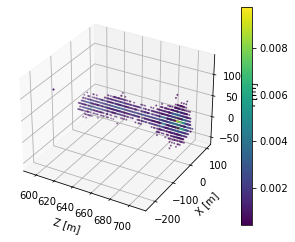

In [103]:
next100 = pd.read_hdf("../../Production/workdir/NEXT100/esmeralda_out.h5", '/CHITS/lowTh')

print(next100.event.unique())

next100_event = next100[next100.event == 10]
display(next100_event)

plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Z [m]')
ax.set_ylabel('X [m]')
ax.set_zlabel('Y [m]')

# ax.set_xlim(575,700)
# ax.set_ylim(-50,200)
# ax.set_zlim(-300,25)


fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('white')  # Set the background color to white

p = ax.scatter(next100_event.Z,next100_event.X,next100_event.Y,cmap='viridis',c=next100_event.Ec, s=1, zorder=2) #coolwarm
cb = fig.colorbar(p, ax=ax)

[0 1 2 3 4 5 6 7 8 9]


<Figure size 432x288 with 0 Axes>

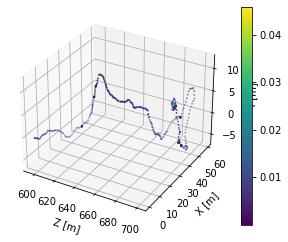

In [104]:
nexus_next100_events = pd.read_hdf("/Users/mistryk2/Packages/nexus/Next100.next.h5", 'MC/hits')
nexus_100_event = nexus_next100_events[nexus_next100_events.event_id == 5]

print(nexus_next100_events.event_id.unique())

plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Z [m]')
ax.set_ylabel('X [m]')
ax.set_zlabel('Y [m]')

# ax.set_xlim(575,700)
# ax.set_ylim(-50,200)
# ax.set_zlim(-300,25)

fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('white')  # Set the background color to white

p = ax.scatter(nexus_100_event.z,nexus_100_event.x,nexus_100_event.y,cmap='viridis',c=nexus_100_event.energy, s=1, zorder=2) #coolwarm
cb = fig.colorbar(p, ax=ax)


In [105]:
next100_b = pd.read_hdf("../../Production/workdir/NEXT100/beersheba_out.h5", '/DECO/Events')
next100_event_b = next100_b[next100_b.event == 10]
# display(next100_event)

<Figure size 432x288 with 0 Axes>

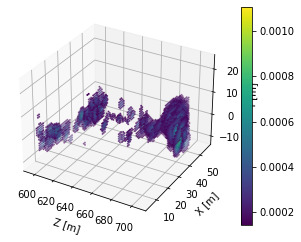

In [106]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Z [m]')
ax.set_ylabel('X [m]')
ax.set_zlabel('Y [m]')

# ax.set_xlim(575,700)
# ax.set_ylim(-50,200)
# ax.set_zlim(-300,25)


fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('white')  # Set the background color to white

p = ax.scatter(next100_event_b.Z,next100_event_b.X,next100_event_b.Y,cmap='viridis',c=next100_event_b.E, s=1, zorder=2) #coolwarm
cb = fig.colorbar(p, ax=ax)